# A quantum subgraph isomorphism algorithm
**Nicola Mariella**<sup>1</sup>**, Anton Dekusar**<sup>1</sup>

<br>

<sup>1</sup> IBM Research Europe - Dublin &amp; IBM Quantum


## The subgraph isomorphism problem
The notion of sub-graph isomorphism is a generalisation of that of graph isomorphism.
The latter consists of finding a mapping (if it exists) between the vertices of two graphs
in such a way that the correspondence is one to one and the connectivity is preserved.
We note that the one-to-one requirement implies that the two input graph have the same number of vertices. 
More in general, we are interested in finding occurrences of smaller graphs (with respect to the number of vertices)
into bigger ones, so the sub-graph isomorphism problem arises.

Before expanding the details of the sub-graph isomorphism problem we formalize the notion of graph.
A *undirected graph* $\mathcal{A}$ is a tuple $(V_\mathcal{A}, E_\mathcal{A})$,
where its components are the finite sets of vertices $V_\mathcal{A}$ and edges $E_\mathcal{A}$,respectively.
In the context of the current work we consider undirected graphs, that is the edges do not consider the notion of direction.
An edge is represented by the two elements set $\{i, j\}$, where $i, j$ belong to the set of vertices.
For simplicity and convenience we consider the vertices as non-negative integers $\{0, 1, \ldots, n-1\}$.
The connectivity of a graph can be expressed using a structure called *adjacency matrix*.
If a graph has $n$ vertices (i.e. the cardinality of $V_\mathcal{A}$), then its adjacency matrix is an $n\times n$ matrix having a $1$ on entries $(i, j)$ and $(j, i)$,
whenever vertices $i$ and $j$ are directly connected by an edge.
Otherwise, when vertices $i$ and $j$ are not directly connected, the corresponding matrix element is set to 0.
In Figure 0 we present an example graph and its corresponding adjacency matrix.
<figure>
<center>
<img src="images/fig0.png" alt="Figure 0" width="500"/>
<figcaption align = "center">Fig. 0 - An example graph and its adjacency matrix.</figcaption>
</figure>
The adjacency matrix provides a means for applying permutations on the vertices of a graph while preserving the connectivity.
Equivalently by simultaneously permuting the rows and the columns of the adjacency matrix we obtain the permutation of the vertices.

<figure>
<center>
<img src="images/fig1.png" alt="Figure 1" width="500"/>
<figcaption align = "center">Fig. 1 - The concept of subgraph isomorphism.</figcaption>
</figure>

In the present work we assume a source graph $\mathcal{A}$ and a small graph $\mathcal{B}$ with the number of vertices of $\mathcal{A}$ typically much greater than the
vertices in $\mathcal{B}$. The concept of subgraph we consider is technically known as *induced subgraph*.
So, given the graphs $\mathcal{A}, \mathcal{B}$, a one-to-one mapping between vertices $f$ is a subgraph isomorphism when for all pair of vertices $i, j$ in $\mathcal{B}$,
$\{i, j\}$ is an edge on $\mathcal{B}$ if and only if $\{f(i), f(j)\}$ is an edge on $\mathcal{A}$.
In Figure 1 it is shown as example of such isomorphism, also it should be clear that in general it is possible to have more occurrences (alongsize symmetries)
of the pattern graph $\mathcal{B}$, so the vertices mapping $f$ is not unique. In Figure 2 instead, it is presented a case where there is no subgraph isomorphism.
It is easy to verify that there is no one-to-one mapping $g$ such that connectivity is preserved,
because graph $\mathcal{C}$ presents vertices with 3 incident edges that find no match in graph $\mathcal{D}$.
<figure>
<center>
<img src="images/fig2.png" alt="Figure 2" width="500"/>
<figcaption align = "center">Fig. 2 - A non-example of subgraph isomorphism.</figcaption>
</figure>


## The quantum algorithm

We present a simplified model of the strategy behind the algorithm outlined in [1].
The first point is that of representing the adjacency
matrices in a way compatible with the quantum model. We obtain a representation of an adjacency matrix as a unitary operator,
noting that in general such matrices are not unitary so we need a strategy for that. Consider the following decomposition for
the $n\times n$ adjacency matrix $A$,
$$A=\sum_{i, j}A_{i, j} \left| i \right\rangle_n \left\langle j \right|_n$$
with $\left| i \right\rangle_n$, in this context, interpreted as the $i$-th standard basis vector for the $n$-dimensional vector space over $\mathbb{C}$.
Also $A_{i, j}$ denotes the $i, j$ entry of the matrix $A$.
Now we outline the "hat" mapping $\widehat{(\cdot)}$ that takes the matrix $A$ into a unitary operator whose structure is compatible with the
operations we need for the subgraph isomorphism (i.e. comparison and permutation of adjacency matrices).
Define the "hat" mapping of the matrix A as
$$\widehat{A} = \sum_{i, j}(-1)^{A_{i, j}} \left| i \right\rangle_n \left| j \right\rangle_n \left\langle i \right|_n \left\langle j \right|_n.$$
By virtue of the use of the [Dirac notation](https://en.wikipedia.org/wiki/Bra–ket_notation) it should be clear that we are
"flattening" the matrix $A$ along the diagonal of the operator $\widehat{A}$. Also the values $A_{i, j} \in \{0, 1\}$
are mapped to the set $\{1, -1\}$. The resulting the operator is diagonal and unitary so it can be implemented as a gate on a quantum computer.
In Figure 2a we provide a visual representation of the action of the hat mapping.
<figure>
<center>
<img src="images/hat-action.png" alt="Figure 2a" width="600"/>
<figcaption align = "center">Fig. 2a - A depiction of the action of the hat operator.</figcaption>
</figure>

Take a graph with $n=2^k$ vertices for some positive integer $k$, then the $n\times n$ adjacency matrix $A$
is represented by the unitary operator $\widehat{A}$ with underlying matrix having size $n^2 \times n^2$.
However, the operator $\widehat{A}$ requires $\log_2(n^2)=2\log_2(n)=2k$ qubits, that is we need 
logarithmic resources with respect to the number of vertices of the input graphs. In other words we can represent
graphs with milions of nodes using only tens of qubits. The latter is one of the key advantages of this work.

Now that we have a representation of adjacency matrices as unitary operators we show that we can translate the classical permutation of such
matrices to an equivalent for $\widehat{(\cdot)}$. First we define more precisely the concept of permutation matrix.
Let $p: \{0, 1, \ldots, (n-1)\} \to \{0, 1, \ldots, (n-1)\}$ be a bijective function between finite sets of integers, then a permutation matrix
is defined as follows
$$P = \sum_{i=0}^{n-1} \left|p(i)\right\rangle_n \left\langle i \right|_n,$$
that is $P$ maps uniquely each $\left| i \right\rangle_n$ to $\left| p(i) \right\rangle_n$.
When the permutation $P$ is applied classically to the adjacency matrix $A$, we obtain
$$ PAP^T = \sum_{i, j}A_{i, j} \left| p(i) \right\rangle_n \left\langle p(j) \right|_n, $$
which corresponds to "renaming" the vertices of each edge according to the function $p$.
In other words, given edge $i \to j$, we obtain edge $p(i) \to p(j)$.
For the representation $\widehat{(\cdot)}$ we note that we can obtain the same effect by appliying the permutation (which is always unitary)
in the following way
$$ (P\otimes P)\widehat{A}(P^T \otimes P^T)= \sum_{i, j}(-1)^{A_{i, j}} \left| p(i) \right\rangle_n \left| p(j) \right\rangle_n \left\langle p(i) \right|_n \left\langle p(j) \right|_n, $$
that is
$$ (P\otimes P)\widehat{A}(P^T \otimes P^T) = \widehat{PAP^T}. $$
The latter equation shows that there is an equivalence between the "classical" permutation and the corresponding
permutation of the unitary representation. Moreover, the structure of the formula re-emerges in the final quantum circuit
that is depicted in Figure 4.

We conclude this section by claiming without providing further details that the permutations $P$ are then substituted by an Ansatz producing a
superposition of permutations so that the final circuit implement a cost function that can be interpreted as a superposition of the cost function
corresponding to the combination of solutions. 
The role of the classical optimiser is that of tuning such superposition of permutations so that it is narrowed down to a subspace containing the potential
solution(s).

In [ ]:
# Installation of the requirements
!python -m pip install -r requirements.txt

In [38]:
from qsubgisom import ansatz, observable, s4_ansatz
from qsubgisom import sample_exact_thetas, perm_to_2line
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import Operator
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
from tqdm import tqdm
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pylatexenc 
%matplotlib inline

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
def checkboard(n):
    """
    Produce a matrix with the checkboard pattern.
    In the case n=4, the resulting 4x4 matrix corresponds to
    the adjacency matrix of a graph having 4 vertices interconnected
    to form a square.
    """
    c = np.arange(n//2)*2
    c = np.tile(c, len(c)), np.repeat(c + 1, len(c))
    m = np.zeros((n, n), dtype=int)
    m[c] = 1
    m[(c[1], c[0])] = 1
    return m

def rnd_perm_mat(n, *, seed=None):
    """
    Produce a nxn random permutation matrix.
    """
    rng = np.random.default_rng(seed=seed)
    m = np.eye(n, dtype=int)
    rng.shuffle(m)
    return m

## The VQE-based approach
The input for the algorithm consists of the pair of graphs $(\mathcal{A}, \mathcal{B})$, with the assumption that the number of vertices of
the first graph $(\mathcal{A})$ is greater than the second one $(\mathcal{B})$.
As the title of the present section suggests the procedure is based on the variational quantum eigensolver (VQE).
The input graphs and the topology for the permutations ansatz determine the ansatz for the algorithm VQE.
The permutation ansatz is one of the blocks forming the overall ansatz, basically it generates a sort of superposition of permutations.
The superposition is tuned by the parameters vector $\mathbf{\theta}$ which is controlled by a classical optimizer.
The cost function resulting from the ansatz, a specific observable and the measurement operation is minimised when the ansatz implements
a permutation (or a set of) that produces a perfect match between a subgraph of $\mathcal{A}$ and the graph $\mathcal{B}$.

The first step is that of obtaining the corresponding adjacency matrices from the input graphs.
In the next cell we prepare the graphs considered in this article.
For illustrative purposes we depict adjacency and permutation matrices using plots marking with a lighter color the non-zero
entries of the matrices.

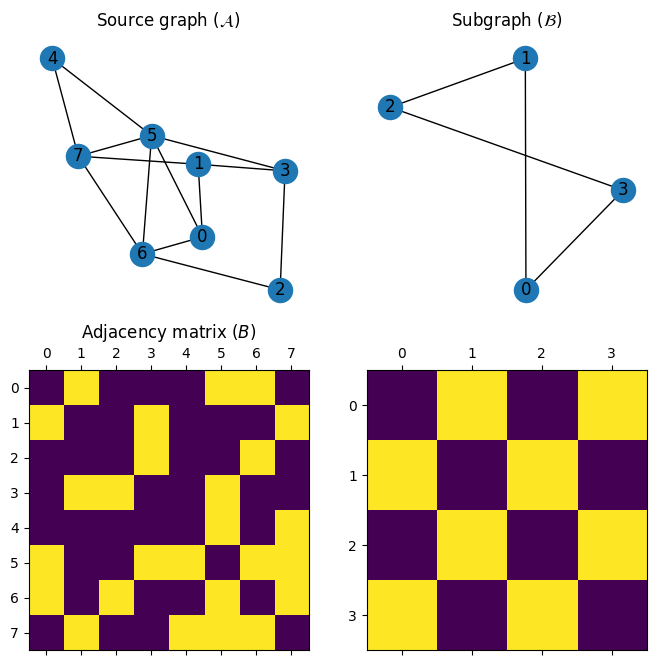

In [ ]:
g1 = nx.generators.erdos_renyi_graph(8, 0.35, seed=14)
adj1 = np.array(nx.adjacency_matrix(g1).todense())

adj2 = checkboard(4)
g2 = nx.from_numpy_array(adj2)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
nx.draw(g1, with_labels=True, ax=axs[0][0])
nx.draw(g2, with_labels=True, ax=axs[0][1])
axs[0][0].set_title('Source graph ($\\mathcal{A}$)')
axs[0][1].set_title('Subgraph ($\\mathcal{B}$)')
axs[1][0].set_title('Adjacency matrix ($A$)')
axs[1][0].matshow(adj1)
axs[1][0].set_title('Adjacency matrix ($B$)')
axs[1][1].matshow(adj2)
plt.show()

In [42]:
seed = 10283764
algorithm_globals.random_seed = seed
rng = np.random.default_rng(seed=seed)

As anticipated we need an ansatz for the VQE, this is readily obtained using the function `ansatz` (see next cell).
One of the resulting objects is a Qiskit `QuantumCircuit` which is later passed to constructor of the Qiskit VQE implementation.
In the plot below, we present the block form of the ansatz circuit where we can appreciate the components.
Referring to the same figure, the `PermAnsatz` blocks are the generators of the superposition of permutation which
are controlled by the classical optimizer through the vector of parameters $\mathbf{\theta}$ (not shown).
The `QAdj` blocks instead correspond to the unitary representation for the adjacency matrices $A$ and $B$, respectively.

In [ ]:
qc, params = ansatz(adj1, adj2)
qc.draw('text')

┌───┐»
i_0: ┤ H ├»
     ├───┤»
i_1: ┤ H ├»
     └───┘»
i_2: ─────»
     ┌───┐»
j_0: ┤ H ├»
     ├───┤»
j_1: ┤ H ├»
     └───┘»
j_2: ─────»
     ┌───┐»
  a: ┤ H ├»
     └───┘»
«     ┌────────────────────────────────────────────────────────────────────────────────────────────────┐»
«i_0: ┤0                                                                                               ├»
«     │                                                                                                │»
«i_1: ┤1 PermAnsatzDg(t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8],t[9],t[10],t[11],t[12],t[13],t[14]) ├»
«     │                                                                                                │»
«i_2: ┤2                                                                                               ├»
«     ├────────────────────────────────────────────────────────────────────────────────────────────────┤»
«j_0: ┤0                                                                                               ├»
«     │                                                                                                │»
«j_1: ┤1 PermAnsatzDg(t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8],t[9],t[10],t[11],t[12],t[13],t[14]) ├»
«     │                                                                                                │»
«j_2: ┤2                                                                                               ├»
«     └────────────────────────────────────────────────────────────────────────────────────────────────┘»
«  a: ──────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                                                                       »
«     ┌───────┐»
«i_0: ┤0      ├»
«     │       │»
«i_1: ┤1      ├»
«     │       │»
«i_2: ┤2      ├»
«     │       │»
«j_0: ┤3 QAdj ├»
«     │       │»
«j_1: ┤4      ├»
«     │       │»
«j_2: ┤5      ├»
«     │       │»
«  a: ┤6      ├»
«     └───────┘»
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────┐»
«i_0: ┤0                                                                                             ├»
«     │                                                                                              │»
«i_1: ┤1 PermAnsatz(t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8],t[9],t[10],t[11],t[12],t[13],t[14]) ├»
«     │                                                                                              │»
«i_2: ┤2                                                                                             ├»
«     ├──────────────────────────────────────────────────────────────────────────────────────────────┤»
«j_0: ┤0                                                                                             ├»
«     │                                                                                              │»
«j_1: ┤1 PermAnsatz(t[0],t[1],t[2],t[3],t[4],t[5],t[6],t[7],t[8],t[9],t[10],t[11],t[12],t[13],t[14]) ├»
«     │                                                                                              │»
«j_2: ┤2                                                                                             ├»
«     └──────────────────────────────────────────────────────────────────────────────────────────────┘»
«  a: ────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                                                                     »
«     ┌───────┐┌───┐
«i_0: ┤0      ├┤ H ├
«     │       │├───┤
«i_1: ┤1      ├┤ H ├
«     │       │└───┘
«i_2: ┤2      ├─────
«     │       │┌───┐
«j_0: ┤3 QAdj ├┤ H ├
«     │       │├───┤
«j_1: ┤4      ├┤ H ├
«     │       │└───┘
«j_2: ┤5      ├─────
«     │       │┌───┐
«  a: ┤6      ├┤ H ├
«     └───────┘└───┘

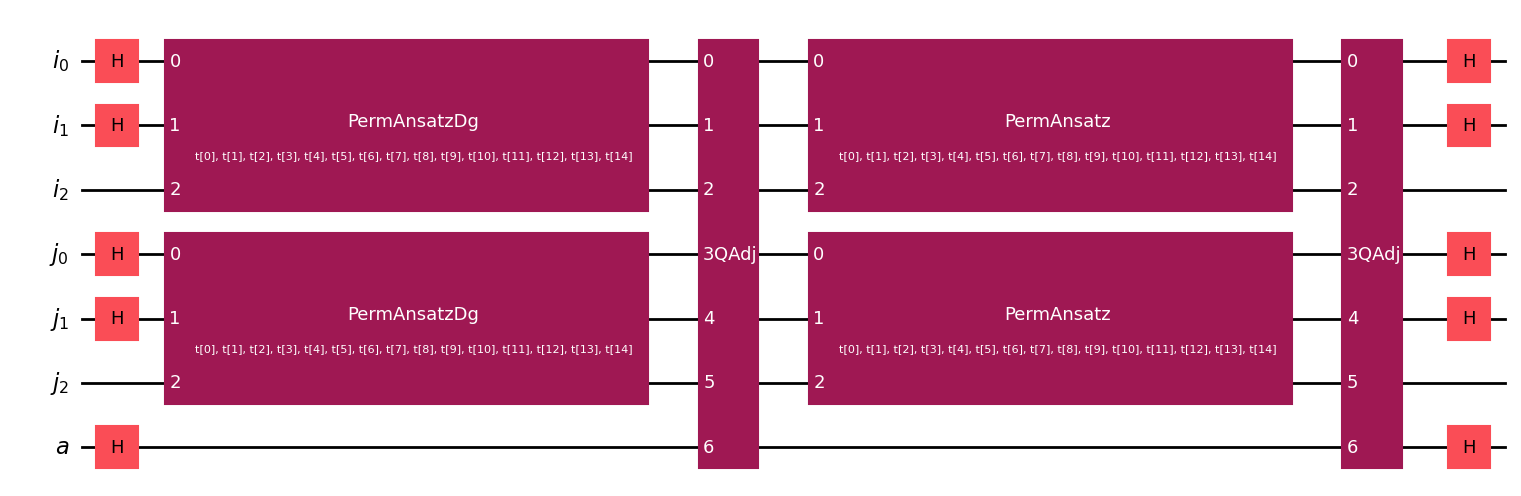

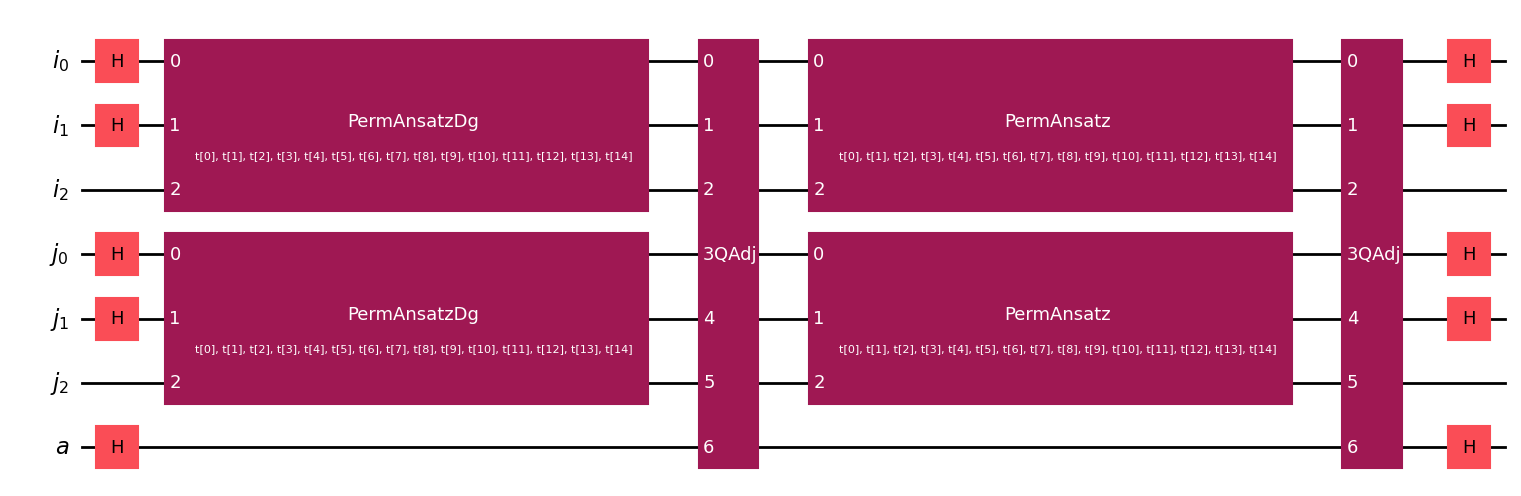

In [44]:
qc.draw('mpl')

Next step we analyse the invocation of the VQE process. In the initialization we prepare
the classical optimizer [SLSQP](https://en.wikipedia.org/wiki/Sequential_quadratic_programming) and the random number generator
for generating the starting points.
The function `trial()` is the core of the procedure where the VQE is invoked. 
In such a function the initial values for the parameters are randomized at each invocation.
This is justified by the fact that the optimization problem is non-convex, so the algorithm potentially converges
to a different solution at each execution. The latter fact shows that the overall procedure should be interpreted as
a sampling of subgraphs rather than an exact matching.

In [ ]:
max_trials = 3
estimator = StatevectorEstimator(seed=seed)
optim = SLSQP(maxiter=1000)

def trial():
    # Randomize initial parameters.
    initial_point = (rng.uniform(size=len(qc.parameters)) - 1/2) * np.pi

    vqe = VQE(estimator, ansatz=qc, optimizer=optim, initial_point=initial_point)

    obj = vqe.compute_minimum_eigenvalue(observable(qc.num_qubits))
    
    return obj.optimal_value, obj

# Run a number of trials and select the one presenting
# the least minimum eigenvalue.
results = [trial() for _ in tqdm(range(max_trials))]
results = sorted(results, key=lambda obj: obj[0])
result = results[0][1]

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [01:52<00:00, 37.52s/it]


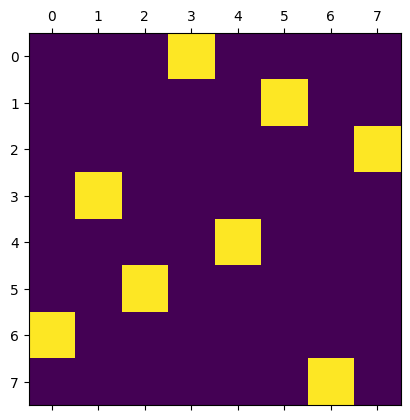

In [ ]:
# Prepare the part of the ansatz implementing the linear composition of permutations.
# Note that the topology must be consistent with that used for the optimization problem above.
qc1 = s4_ansatz('circular', qreg=(qc.num_qubits - 1)//2, params=params)[0]

def cost_f(adj1, adj2, p):
    m = p @ adj1 @ p.T
    m = m[:len(adj2), :len(adj2)]
    return np.linalg.norm(m - adj2)

sampled_params_dicts = sample_exact_thetas(result.optimal_parameters,
                                           n=32, seed=seed)
min_cost = np.inf

for v in sampled_params_dicts:
    qc_bound = qc1.assign_parameters(v)
    p1 = np.abs(Operator(qc_bound).data)
    
    p1 = np.round(p1)
    cost = cost_f(adj1, adj2, p1)
    if cost < min_cost:
        p2 = p1
        if cost < 1.:
            break

# Plot the permutation matrix that presents the least cost.
plt.matshow(p2, vmin=0, vmax=1)
plt.show()

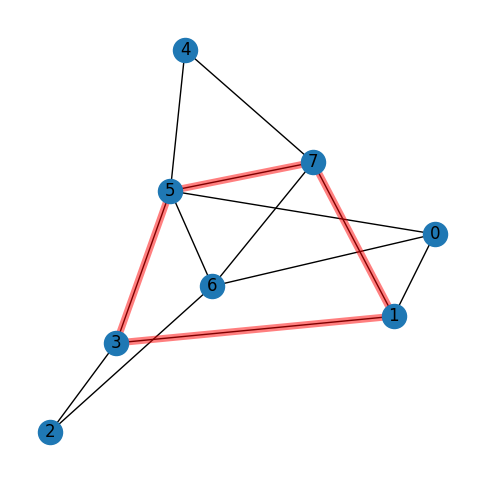

In [ ]:
def plot_solution_edges(g1, *, pos, perm, ax):
    vx_sel = perm_to_2line(perm, inverse=True)
    
    vx_sel = vx_sel[1, :len(adj2)]
    
    nx.draw_networkx_edges(g1.subgraph(vx_sel), pos,
                           width=5.0, alpha=0.5, edge_color='r', ax=ax)

fig, ax = plt.subplots(figsize=(6, 6))
g1_pos = nx.spring_layout(g1, seed=42) 
nx.draw(g1, g1_pos, with_labels=True, ax=ax)
plot_solution_edges(g1, pos=g1_pos, perm=p2, ax=ax)
plt.show()

In the next plot we should immediately notice the mechanism behind the algorithm. Specifically, the algorithm is identifying a permutation matrix $P$, such that
its action $PAP^T$ on the adjacency matrix $A$ produces the adjacency matrix $B$ as a principal submatrix of the permuted $A$.
In other words the pattern corresponding to the matrix $B$ appears on a top-left submatrix of $PAP^T$.
Now, our permutation is a bijection $p: \{0, 1, \ldots, n - 1\} \to \{0, 1, \ldots, n - 1\}$ between the vertices of the graph $\mathcal{A}$.
By considering the inverse permutation $p^{-1}$ with domain restricted to the indices of the vertices corresponding to the graph $\mathcal{B}$
we obtain a one-to-one mapping between the vertices of the graph $\mathcal{B}$ and those of $\mathcal{A}$. The latter mapping is a solution
to the subgraph isomorphism problem, in the context of our example, Figure 6 illustrates the mapping applied to the source graph.

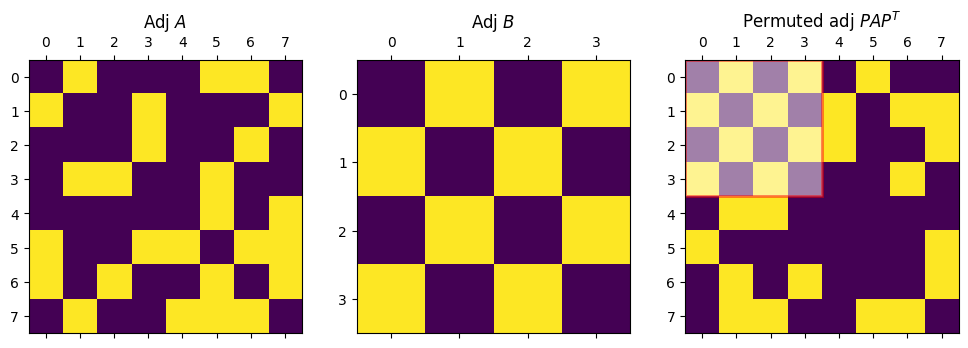

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.patch.set_facecolor('white')
axs[0].matshow(adj1)
axs[0].set_title('Adj $A$')
axs[1].matshow(adj2)
axs[1].set_title('Adj $B$')
axs[2].matshow(p2 @ adj1 @ p2.T)
axs[2].set_title('Permuted adj $PAP^T$')
rect = patches.Rectangle((-0.5, -0.5), len(adj2), len(adj2), linewidth=2,
                         edgecolor='red', facecolor='white', alpha=0.5)
axs[2].add_patch(rect)
plt.show()

In Figure 7 we present a case of *partial match* that is the permutation obtained by the algorithm does not produce a perfect match for the
adjacency matrix of the pattern graph. There are three possible causes for the phenomenon.
The first reason could be that the ansatz implementing the superposition of permutations cannot represent any of the permutations corresponding
to the solutions. The second cause could be that the optimizer got stuck on a local minimum. The last one instead, correponds to the case that there
is no solution for the input pair $(\mathcal{A}, \mathcal{B})$.
<figure>
<center>
<img src="images/fig7.png" alt="Figure 7" width="450"/>
<figcaption align = "center">Fig. 7 - An example of partial matching.</figcaption>
</figure>

## Applications in Financial Services
**Mehrdad Maleki**<sup>2</sup>**, Steve Flinter**<sup>2</sup>**, Prina Patel**<sup>3</sup>

<br>

<sup>2</sup> Mastercard Ireland

<sup>3</sup> Mastercard UK

<br>

The process of disguising the illegal source of money to look like clean money is called money laundering. Different criminal activities lead to money laundering such as illegal arms sales, contraband smuggling, embezzlement, insider trading, bribery, computer fraud schemes, and narcotics trafficking [2]. Criminals undertake money laundering by changing the form of the fund or moving money to less likely suspicious assets or funds and disgusting the source. According to [FATF](https://www.fatf-gafi.org), money laundering can be achieved through virtually every medium, financial institution, or business [2].

Money laundering is a complex activity and includes complex transactions that are almost indistinguishable from legitimate ones. There are, however, three main stages in money laundering: **Placement**, **Layering**, and **Integration**. In the **Placement** stage, the illegal funds are placed into circulation through legitimate financial institutions. Examples of Placement include blending of funds, purchasing of foreign exchange, currency smuggling, etc. In the **Layering** stage, the source will be concealed through layers of legitimate financial institutions. Examples of Layering include moving funds from one financial institution to another, converting the cash placed into monetary instruments, etc. In the **Integration** stage, the funds from a legitimate business source will be integrated as a normal business or personal transaction. Examples of Integration include purchasing a luxury car, etc.

This kind of pattern can be discovered by analyzing some repeated graphical patterns, or motifs, in the transaction network [3]. In this graph, nodes are used to represent accounts, and edges transactions. The existence of an edge from one node to another node represents the transaction from one account to another one. Finding repeated patterns in the network is a *sub-graph isomorphism* problem, where sub-graph isomorphism means finding specific patterns in the original network that is looks exactly like (by some permutations (rearrangment) of nodes) the given pattern. By finding specific patterns that happen in money laundering, we can identify the illegal source of the money. The main application of this problem is funds recovery.

## Acknowledgements
Thanks to Tara Murphy for proofreading the article.

## References
- [1] A Quantum Algorithm for the Sub-Graph Isomorphism Problem. Nicola Mariella, Andrea Simonetto. [arXiv:2111.09732](https://arxiv.org/abs/2111.09732)
- [2] [Study Guide - CAMS Certification Exam](https://www.acams.org/en/certifications/cams-certification#overview-e1131add).
- [3] Uri Alon. [Network motifs: theory and experimental approaches](https://www.weizmann.ac.il/mcb/UriAlon/sites/mcb.UriAlon/files/network_motifs_nature_genetics_review.pdf). Nature Reviews:Genetics. Volume 8, June 2007.
- [4] Quantum subgraph isomorphism [source code](https://github.com/qiskit-community/subgraph-isomorphism).